*DAIA - Week 4 Assignment*

# Missing data in the Titanic dataset

## 1. Introduction

In this titanic example we will focus on how to find, label and deal with missing data. Make sure you have studies the study materials in Canvas about the various types of missing data and how to handle these kind of missing data.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's these strings have to be converted to numerical data first (at least the columns that are of interest)!

## 2. Data collection

Pandas is a Python module that works with the so-called dataframe concept (rows are observations, columns refer to the features). A dataframe is essentially a two-dimensional labeled data structure where
each column represent a feature and each row represents an observation.

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

Download the Titanic dataset (csv file) from Canvas, read it with Pandas into a dataframe. Show the first 5 rows.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)

## To get you started...
df_titanic = pd.read_csv("Titanic.csv")
df_titanic.columns =['passengers','pclass','survived','name','age','embarked','home/dest','room','ticket','boat','sex']
df_titanic.head(5)

numpy version: 1.24.4
matplotlib version: 2.1.0


,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


## 3.  Data understanding

You can examine the datatypes and some general (statistical) information about the dataset. See if you can already see something odd or striking, which indicates missing data.

 Firsly we need to get to know the data that we are provided with, after that we should ensure that we have the correct data types, we might need to convert so,=me of them,
 and lastly by the dataTypes we can conclude what kind of visualizations would be appropriate. Data types check is essential for data preprocessing and data analysis


In [2]:
df_titanic.dtypes


passengers      int64
pclass         object
survived        int64
name           object
age           float64
embarked       object
home/dest      object
room           object
ticket         object
boat           object
sex            object
dtype: object

# Identifying missing data and its type

There are missing values of age, embarked, home/dest, room, ticket, sex. Let's get age and room for example and we will see how we can handle the missing data. 

In [3]:
## Your code and comments here...

df_titanic.isnull().sum()


passengers       0
pclass           0
survived         0
name             0
age            680
embarked       492
home/dest      559
room          1236
ticket        1244
boat           966
sex              0
dtype: int64

Since the features sex and pclass are categorical, I am going to convert the into numerical values.

In [4]:
df_titanic["pclass"] = df_titanic["pclass"].map({"1st":1, "2nd":2, "3rd":3}).astype(int)
df_titanic["sex"] = df_titanic["sex"].map({"male":0, "female":1}).astype(int)
df_titanic.sample(5)

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex
1120,1121,3,0,"Pedersen, Mr Olaf",NaN,NaN,NaN,NaN,NaN,NaN,0
462,463,2,1,"Jerwan, Mrs Amin S. (Marie Thuillard)",23.0,Cherbourg,"New York, NY",NaN,NaN,NaN,1
428,429,2,1,"Harper, Miss Nina",6.0,Southampton,"Denmark Hill, Surrey / Chicago",NaN,NaN,11,1
112,113,1,0,"Futrelle, Mr Jacques",37.0,Southampton,"Scituate, MA",NaN,NaN,NaN,0
868,869,3,0,"Holthen, Mr Johan Martin",NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df_titanic['age'].isnull().sum()

680

## 4. Data Preparation

### 4.1. Deal with Missing Values

Based on the first plot we can see that there is a huge part missing from the age of the 3rd class passengers. There are still missing values for the passengers in the higher classes, but this pattern suggests that there could be a relationship between the age and class type. So the missing data could be MAR. Imputation could be an approach in our case.

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

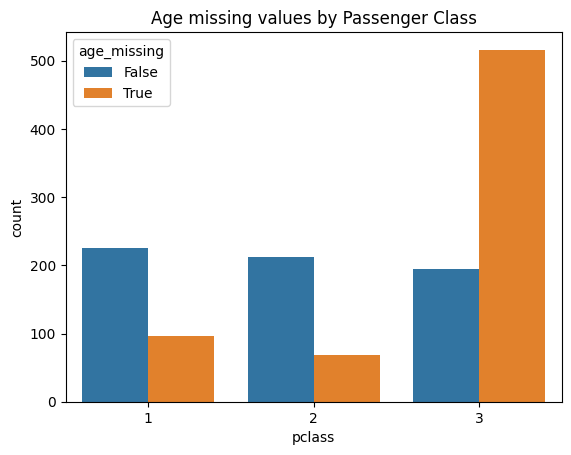

In [6]:
import matplotlib.pyplot as plt

df_titicanic_copy = df_titanic.copy()

df_titicanic_copy['age_missing'] = df_titicanic_copy['age'].isnull()

sns.countplot(data=df_titicanic_copy, x='pclass', hue='age_missing')
plt.title('Age missing values by Passenger Class')
plt.show()

How we can handle the missing values in here: One way is to delete the column age, but it would not be the perfectsolution in our case, since age can be used for either predicting models or as a context for the other missing values. Other way can be imputation. 

In this example, I am using the k-nearest neighbor approach. 

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

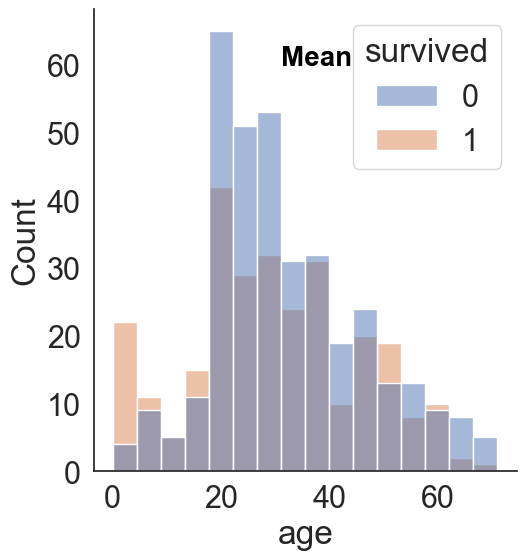

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_titanic[['age-kn']] = imputer.fit_transform(df_titanic[['age']])

plt.figure(figsize=(12,6))
sns.set_palette("bright")
sns.set(font_scale = 2)
sns.set_style("white")
plt.subplot(1,2,1)
ax = sns.histplot(x="age", hue="survived", data=df_titanic)
plt.text(df_titanic['age'].mean(), 60, "Mean", size='small', color='black', weight='semibold')
sns.despine()


Another type of imputation is using the mean values of age 

<Axes: >

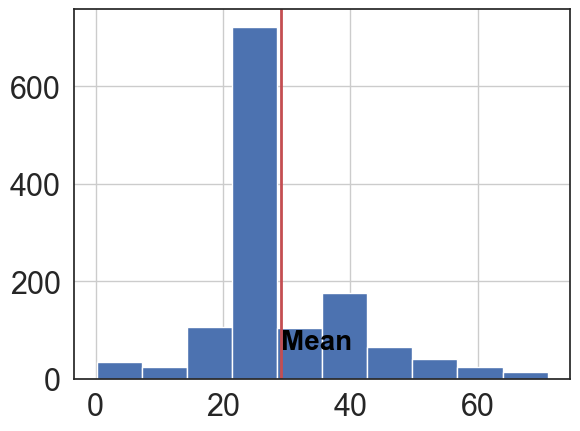

In [8]:
# Calculate the mean age for each passenger class
class_means = df_titanic.groupby('pclass')['age'].mean()

# Impute missing ages based on passenger class
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['pclass'].map(class_means))
plt.text(df_titanic['age'].mean(), 60, "Mean", horizontalalignment='left', size='small', color='black', weight='semibold')
plt.axvline(x=df_titanic['age'].mean(), color='r', linestyle='-', linewidth=2)
df_titanic['age'].hist()

In [9]:

df_titanic

,passengers,pclass,survived,name,age,embarked,home/dest,room,ticket,boat,sex,age-kn
0,1,1,1,"Allen, Miss Elisabeth Walton",29.000000,Southampton,"St Louis, MO",B-5,24160 L221,2,1,29.000000
1,2,1,0,"Allison, Miss Helen Loraine",2.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,1,2.000000
2,3,1,0,"Allison, Mr Hudson Joshua Creighton",30.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,-135,0,30.000000
3,4,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,1,25.000000
4,5,1,1,"Allison, Master Hudson Trevor",0.916700,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,0,0.916700
...,...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3,0,"Zakarian, Mr Artun",24.519658,NaN,NaN,NaN,NaN,NaN,0,31.194181
1309,1310,3,0,"Zakarian, Mr Maprieder",24.519658,NaN,NaN,NaN,NaN,NaN,0,31.194181
1310,1311,3,0,"Zenn, Mr Philip",24.519658,NaN,NaN,NaN,NaN,NaN,0,31.194181
1311,1312,3,0,"Zievens, Rene",24.519658,NaN,NaN,NaN,NaN,NaN,1,31.194181


In [10]:
df_titanic['age'].isnull().sum()


0

Another missing feature with a hueg number of missing values is the ticket. Since ticket is not a very important feature that the dataset has, I could in this case just drop the column


In [11]:
df_titanic=df_titanic.drop(['ticket'],axis=1)
df_titanic

,passengers,pclass,survived,name,age,embarked,home/dest,room,boat,sex,age-kn
0,1,1,1,"Allen, Miss Elisabeth Walton",29.000000,Southampton,"St Louis, MO",B-5,2,1,29.000000
1,2,1,0,"Allison, Miss Helen Loraine",2.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,1,2.000000
2,3,1,0,"Allison, Mr Hudson Joshua Creighton",30.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,-135,0,30.000000
3,4,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.000000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,1,25.000000
4,5,1,1,"Allison, Master Hudson Trevor",0.916700,Southampton,"Montreal, PQ / Chesterville, ON",C22,11,0,0.916700
...,...,...,...,...,...,...,...,...,...,...,...
1308,1309,3,0,"Zakarian, Mr Artun",24.519658,NaN,NaN,NaN,NaN,0,31.194181
1309,1310,3,0,"Zakarian, Mr Maprieder",24.519658,NaN,NaN,NaN,NaN,0,31.194181
1310,1311,3,0,"Zenn, Mr Philip",24.519658,NaN,NaN,NaN,NaN,0,31.194181
1311,1312,3,0,"Zievens, Rene",24.519658,NaN,NaN,NaN,NaN,1,31.194181


Since we have missing values for room and  boat as well, but infortunately in this case it si hard to conclude the values for them. The room number or boat are probably not going to be use, so I decided to drop those column as well. 


In [12]:
df_titanic=df_titanic.drop(['room','boat'],axis=1)
df_titanic

,passengers,pclass,survived,name,age,embarked,home/dest,sex,age-kn
0,1,1,1,"Allen, Miss Elisabeth Walton",29.000000,Southampton,"St Louis, MO",1,29.000000
1,2,1,0,"Allison, Miss Helen Loraine",2.000000,Southampton,"Montreal, PQ / Chesterville, ON",1,2.000000
2,3,1,0,"Allison, Mr Hudson Joshua Creighton",30.000000,Southampton,"Montreal, PQ / Chesterville, ON",0,30.000000
3,4,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.000000,Southampton,"Montreal, PQ / Chesterville, ON",1,25.000000
4,5,1,1,"Allison, Master Hudson Trevor",0.916700,Southampton,"Montreal, PQ / Chesterville, ON",0,0.916700
...,...,...,...,...,...,...,...,...,...
1308,1309,3,0,"Zakarian, Mr Artun",24.519658,NaN,NaN,0,31.194181
1309,1310,3,0,"Zakarian, Mr Maprieder",24.519658,NaN,NaN,0,31.194181
1310,1311,3,0,"Zenn, Mr Philip",24.519658,NaN,NaN,0,31.194181
1311,1312,3,0,"Zievens, Rene",24.519658,NaN,NaN,1,31.194181


We also have missing data for embarked. 

c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\denic\miniconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

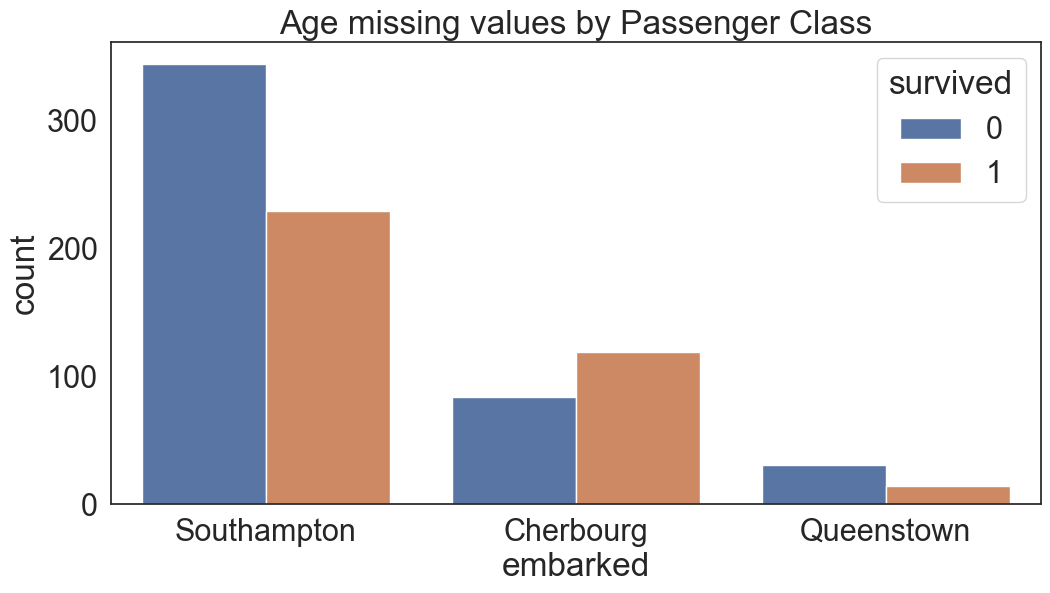

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(data=df_titicanic_copy, x='embarked', hue='survived')
plt.title('Age missing values by Passenger Class')
plt.show()

For the embarked feature, I decided to put the most common value. 

In [15]:

mode_embarked=df_titanic['embarked'].mode()[0]
df_titanic['embarked'].fillna(mode_embarked,inplace=True)
df_titanic


passengers      0
pclass          0
survived        0
name            0
age             0
embarked        0
home/dest     559
sex             0
age-kn          0
dtype: int64

For home/dest I decided that I am going to fill the null values with unknown.

In [19]:
df_titanic['home/dest'].fillna('Unknown', inplace=True)
df_titanic

,passengers,pclass,survived,name,age,embarked,home/dest,sex,age-kn,destination_category
0,1,1,1,"Allen, Miss Elisabeth Walton",29.000000,Southampton,"St Louis, MO",1,29.000000,High-Class Destination
1,2,1,0,"Allison, Miss Helen Loraine",2.000000,Southampton,"Montreal, PQ / Chesterville, ON",1,2.000000,High-Class Destination
2,3,1,0,"Allison, Mr Hudson Joshua Creighton",30.000000,Southampton,"Montreal, PQ / Chesterville, ON",0,30.000000,High-Class Destination
3,4,1,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.000000,Southampton,"Montreal, PQ / Chesterville, ON",1,25.000000,High-Class Destination
4,5,1,1,"Allison, Master Hudson Trevor",0.916700,Southampton,"Montreal, PQ / Chesterville, ON",0,0.916700,High-Class Destination
...,...,...,...,...,...,...,...,...,...,...
1308,1309,3,0,"Zakarian, Mr Artun",24.519658,Southampton,Unknown,0,31.194181,Low-Class Destination
1309,1310,3,0,"Zakarian, Mr Maprieder",24.519658,Southampton,Unknown,0,31.194181,Low-Class Destination
1310,1311,3,0,"Zenn, Mr Philip",24.519658,Southampton,Unknown,0,31.194181,Low-Class Destination
1311,1312,3,0,"Zievens, Rene",24.519658,Southampton,Unknown,1,31.194181,Low-Class Destination


Lastly let's check if there are any null values in the datasets.

In [20]:
df_titanic.isnull().sum()

passengers              0
pclass                  0
survived                0
name                    0
age                     0
embarked                0
home/dest               0
sex                     0
age-kn                  0
destination_category    0
dtype: int64

# Conclusion

In the beginning of the notebook, there were some missing values of the features. There are some ways in handling missing data. Based on the specific features, there are different ways in handling the problem. Either with imputation or delete the column. For age feature there could be a relationships with the other features, embarked could depend on the other features as well, so I could conclude that this is MAR. MNAR could be the missing values for home/dest, room, ticket and boat. 